<a href="https://colab.research.google.com/github/bikash119/learn_tensorflow/blob/main/learn_tf_002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
import datetime

print(f" TF version : {tf.__version__}")
print(f" Last known execution of the notebook : {datetime.datetime.now()}")

 TF version : 2.12.0
 Last known execution of the notebook : 2023-06-25 22:11:17.898644


Steps in modelling with Tensorflow
1. **Creating a model**: Piece together the layers of a neural network yourself or import a previously built model (known as Transfer Learning ).
2. **Compiling a model** : defining how a models performance should be measured( loss/metrics) as well as defining how it can be improved(optimizer).
3. **Fitting a model** : letting the model try to find patterns in the data.

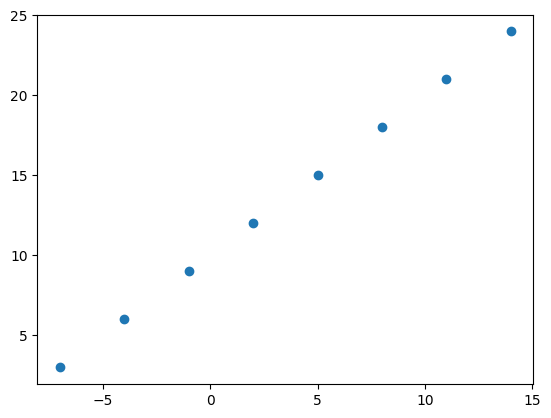

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Create features ( using tensors )
X = tf.constant([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])
# Create labels ( using tensors)
y = tf.constant([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

# visualize it
plt.scatter(X,y)

In [9]:
# Set random seed
tf.random.set_seed(42)

#1. creating the model
model = tf.keras.Sequential(
    tf.keras.layers.Dense(1)
)

#2. Compile the model
model.compile(loss=tf.keras.losses.mae
              ,optimizer = tf.keras.optimizers.SGD()
              ,metrics=["mae"])

# Fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 646ms/step - loss: 20.2900 - mae: 20.2900
Epoch 2/5
1/1 [==============================] - 0s 18ms/step - loss: 20.0088 - mae: 20.0088
Epoch 3/5
1/1 [==============================] - 0s 22ms/step - loss: 19.7275 - mae: 19.7275
Epoch 4/5
1/1 [==============================] - 0s 21ms/step - loss: 19.4463 - mae: 19.4463
Epoch 5/5
1/1 [==============================] - 0s 21ms/step - loss: 19.1650 - mae: 19.1650


In [10]:
model.predict([17.0])

1/1 [==============================] - 0s 436ms/step


array([[-19.915308]], dtype=float32)

Steps to improving the model
1. _Creating a model_ : Here we might want to add more layers, increase the number of hidden units, change the activation function in each layer.
2. _Compiling a model_: We might want to choose a different optimizer or change the **learning rate** of the optimization function
3. _Fitting a model_ : we could also try fit the model for more **epochs**

_There are many different ways to improve a neural network. Some of the most common include : increasing the number of layers (making the network deeper), increasing the number of hidden units (making the network wider) and changing the learning rate. Because these values are human-changeable, they are referred to as hyperparameters and the practice of trying to find the best hyperparameters is referred to as hyperparameter-tuning_

In [12]:
# Lets try to improve our model by training it a little longer
# set seeds
tf.random.set_seed(42)

#1.Create the model
model = tf.keras.Sequential(
    tf.keras.layers.Dense(1)
)
model.compile (loss= tf.keras.losses.mae
               ,optimizer = tf.keras.optimizers.SGD()
               ,metrics=["mae"])

model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 370ms/step - loss: 9.6808 - mae: 9.6808
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 9.5483 - mae: 9.5483
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 9.4158 - mae: 9.4158
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 9.2833 - mae: 9.2833
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 9.1508 - mae: 9.1508
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 9.0183 - mae: 9.0183
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 8.8858 - mae: 8.8858
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 8.7533 - mae: 8.7533
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 8.6208 - mae: 8.6208
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 8.4883 - mae: 8.4883
Epoch 11/100
1/1 [==============================] - 0s 9ms/step - loss: 

In [13]:
model.predict([17.0])

1/1 [==============================] - 0s 242ms/step


array([[30.055235]], dtype=float32)

A typical workflow that we will have to go through while building neural networks is
`build model -> evaluate it -> build (tweak) model -> evaluate it -> build (tweak) model -> evaluate it...`

## Visualize Visuzalize Visualize

1. **The data**
2. **The Model**
3. **The training of the Model**
4. **The prediction of the Model**

In [14]:
# Make a bigger dataset
X = np.arange(-100,100,4)
y = np.arange(-90,110,4)


Split the data into Training , Validation , Test set

In [15]:
#Split the dataset into Training, Validation and Test
len(X)

50

In [19]:
X_train = X[:40]
y_train = y[:40]
X_test = X[40:]
y_test = y[40:]

len(X_train),len(X_test)

(40, 10)

Visualize the train and test data

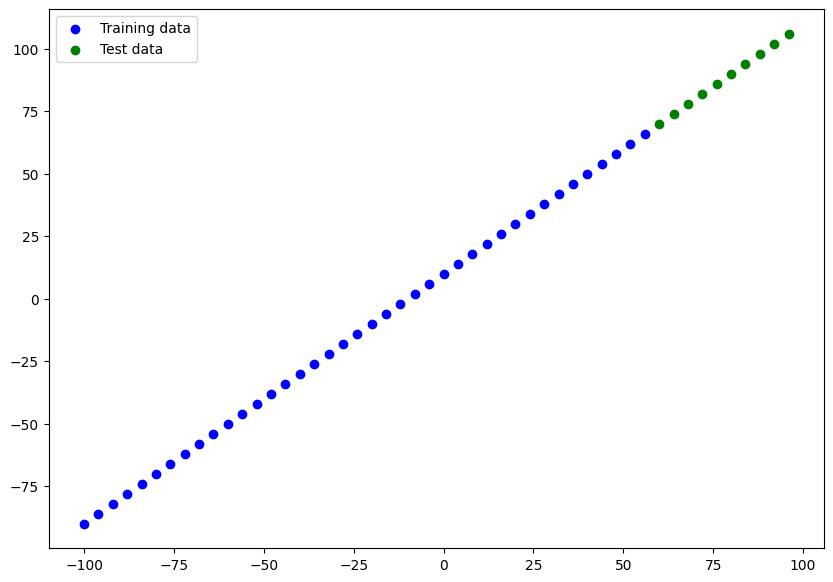

In [20]:
plt.figure(figsize=(10,7))
#plot the training data
plt.scatter(X_train,y_train,c='b',label='Training data')
#plot the test data
plt.scatter(X_test,y_test,c='g',label='Test data')
#show legend
plt.legend();

In [34]:
#Train the model , exactly same as earlier

#set seed
tf.random.set_seed(42)

# create model
#input_shape should be equal to X_train.ndim
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1])
]
)
# compile the model
model.compile(loss=tf.keras.losses.mae
              ,optimizer=tf.keras.optimizers.SGD()
              ,metrics=["mae"])

#fit the model
model.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 12ms/step - loss: 12.0574 - mae: 12.0574
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 13.1486 - mae: 13.1486
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 11.8115 - mae: 11.8115
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 9.2559 - mae: 9.2559
Epoch 5/100
2/2 [==============================] - 0s 10ms/step - loss: 10.1191 - mae: 10.1191
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 9.3866 - mae: 9.3866
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 8.5330 - mae: 8.5330
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 9.0351 - mae: 9.0351
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 18.6697 - mae: 18.6697
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 10.0642 - mae: 10.0642
Epoch 11/100
2/2 [==============================] - 0s 8ms/step -

Visualizing the model

In [35]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


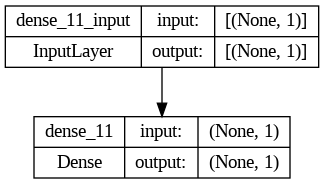

In [36]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True)

In [37]:
y_preds = model.predict(X_test)
y_preds

1/1 [==============================] - 0s 57ms/step


array([[44.60274 ],
       [47.488174],
       [50.373608],
       [53.25904 ],
       [56.144474],
       [59.029907],
       [61.915337],
       [64.800766],
       [67.6862  ],
       [70.57163 ]], dtype=float32)

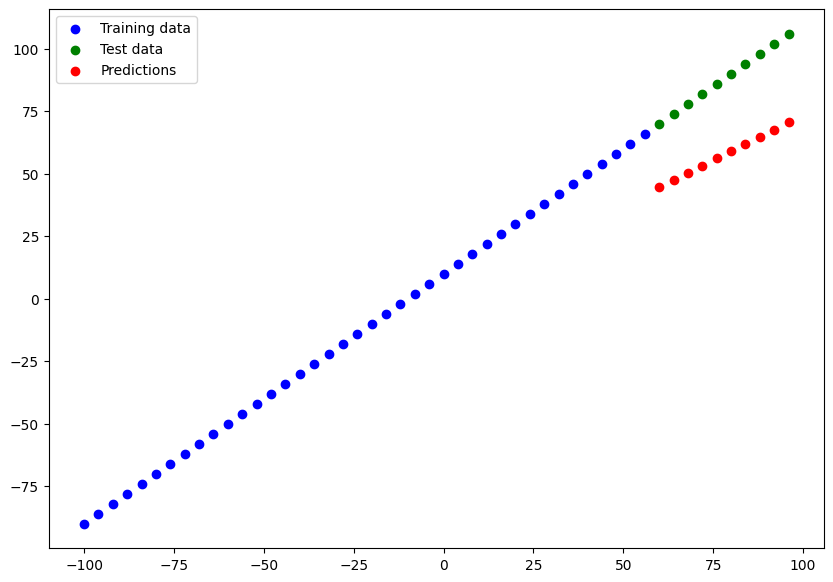

In [38]:
# Function to plot predictions
def plot_predictions(train_data=X_train
                     ,train_label=y_train
                     ,test_data=X_test
                     ,test_label=y_test
                     ,predictions=y_preds):

  plt.figure(figsize=(10,7))

  #Plot the training data
  plt.scatter(train_data,train_label,c='b',label="Training data")
  #Plot the test data
  plt.scatter(test_data,test_label,c='g',label="Test data")
  #Plot the training data
  plt.scatter(test_data,y_preds,c='r',label="Predictions")
  #Show legend
  plt.legend();

plot_predictions()

## Evaluate Predictions
Two main metrics for regression problems
1. MAE (Mean Absolute Error) : the mean difference between each of the predictions.
2. MSE (Mean Squared Error) : the squared mean difference between the predictions.

In [39]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 457ms/step - loss: 30.4128 - mae: 30.4128


[30.412811279296875, 30.412811279296875]

In [41]:
mae = tf.metrics.mean_absolute_error(y_true=y_test
                                     ,y_pred=y_preds)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([43.39726 , 40.511826, 37.626392, 34.74096 , 31.855526, 28.970093,
       26.084661, 23.199234, 20.313797, 17.542694], dtype=float32)>

Since the shape of y_preds & y_test are different, the `tf.metrics.mean_absolute_error` responded with an array, where as we expect a single value


In [42]:
y_test.shape, y_preds.shape

((10,), (10, 1))

In [43]:
y_test.shape, y_preds.squeeze().shape

((10,), (10,))

In [45]:
mae = tf.metrics.mean_absolute_error(y_true=y_test
                                     ,y_pred=y_preds.squeeze())
mae

<tf.Tensor: shape=(), dtype=float32, numpy=30.412811>

In [46]:
mse = tf.metrics.mean_squared_error(y_true=y_test
                                    ,y_pred=y_preds.squeeze())
mse

<tf.Tensor: shape=(), dtype=float32, numpy=935.1877>